<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [26]:
np.random.rand()                # Give one number

0.34639478427696613

In [27]:
np.random.rand(10)              # Give ten numbers`

array([0.04847722, 0.40323733, 0.88045787, 0.74176253, 0.46399113,
       0.57574053, 0.62675199, 0.75351416, 0.66628637, 0.70751876])

In [28]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.83247103, 0.18544893],
       [0.71169076, 0.9150018 ],
       [0.14981563, 0.87713823],
       [0.11472618, 0.0586566 ],
       [0.02601975, 0.40525971]])

In [29]:
#notice all numbers are between 0 and 1
#numbers are more or less evenly (i.e. uniformly) distributed

In [30]:
#generate a large set of numbers and check if the percentages of numbers match
n = 10000
random_numbers = np.random.rand(n)

In [31]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

49.63

In [32]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

24.98

In [33]:
# The numbers more than .75 must be about 25%
np.sum(random_numbers > .75) / n * 100

24.959999999999997

### 1.3 A simple graphical test

In [30]:
import matplotlib
from matplotlib import pyplot as plt

Text(0, 0.5, 'Value of random number')

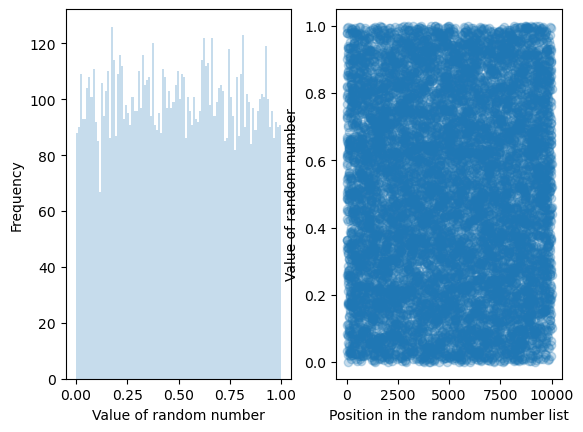

In [35]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

In [ ]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

#notice numbers are now between 50 and 100

### 1.5 ‘seeding’ a PRNG

In [ ]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

In [36]:
np.random.seed(1234)              # Specifying a seed --> always the same outcomes
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [37]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [38]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [39]:
np.random.choice(['Head', 'Tails'])

'Head'

In [40]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins)

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [23]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [24]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 50.10%


### 3.2 A biased coin

In [25]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 70.50%


### 3.3 A flipping experiment

In [26]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

In [28]:
heads_probability = heads_counts/no_of_repeats
heads_probability

array([0.0014, 0.0093, 0.0445, 0.1125, 0.2005, 0.2534, 0.2126, 0.1159,
       0.0392, 0.0095, 0.0012])

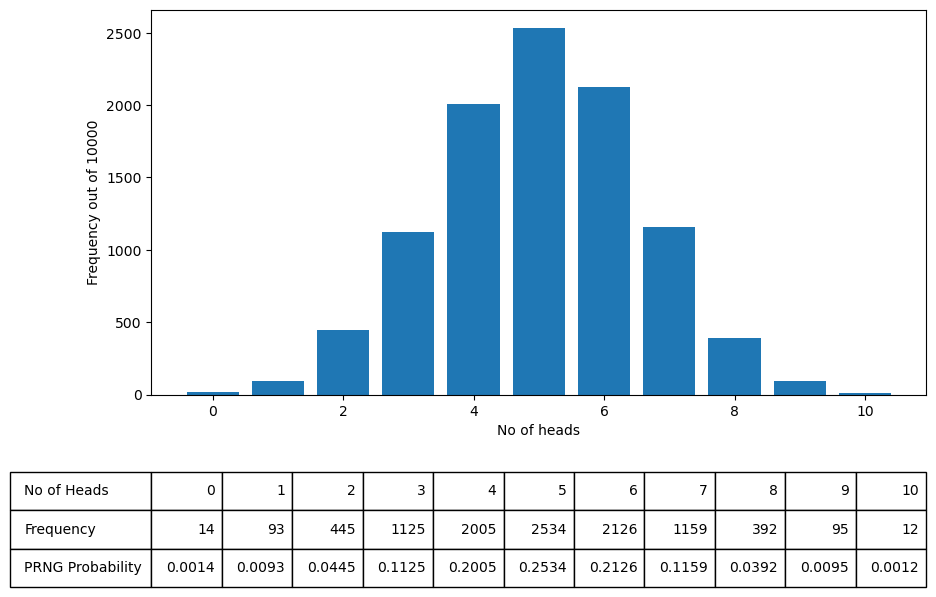

In [32]:
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [46]:
conda install scipy

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [47]:
from scipy.stats import binom

In [48]:
binom.pmf(k=7, n=10, p=.5)

0.11718750000000004

## Exercise 1 :  12C, 13C

In [18]:
#1
k=0
n=27
p=0.0111
mean = n*p
mean

0.2997

In [20]:
#standard deviation
import math
sd=math.sqrt(n*p*(1-p))
sd

0.5444018093283673

In [17]:
#2
#P(13C == 0)
ncr=np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))
pk=np.power(p,k)
pnk=np.power(1-p,n-k)
probability=ncr*pk*pnk
probability

0.7397997429318266

In [83]:
#checking ans
binom.pmf(k=0,n=27, p=0.0111)

0.7397997429318266